In [1]:
# the data used for this study was collected from Udemy data science exercise..
# Henry Nwachukwu Project 2 Date submitted: 12:02:2020 ERP COLLEGE....
# Project Summary: To compare accuracy of the predicted logistics regression using Scaled and Unscaled features.

In [2]:
# Import Relevant libraries for the studies:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import sys
!{sys.executable} -m pip install xgboost
from xgboost import XGBClassifier

In [3]:
Data = pd.read_csv('Absenteeism_data.csv')

In [4]:
Data.columns

Index(['ID', 'Reason for Absence', 'Date', 'Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average', 'Body Mass Index',
       'Education', 'Children', 'Pets', 'Absenteeism Time in Hours'],
      dtype='object')

In [5]:
Data.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [6]:
Data.shape

(700, 12)

In [7]:
Data['Reason for Absence'].unique()

array([26,  0, 23,  7, 22, 19,  1, 11, 14, 21, 10, 13, 28, 18, 25, 24,  6,
       27, 17,  8, 12,  5,  9, 15,  4,  3,  2, 16], dtype=int64)

In [8]:
# checking for missing Values
Data.isnull().sum()

ID                           0
Reason for Absence           0
Date                         0
Transportation Expense       0
Distance to Work             0
Age                          0
Daily Work Load Average      0
Body Mass Index              0
Education                    0
Children                     0
Pets                         0
Absenteeism Time in Hours    0
dtype: int64

In [9]:
y_train=Data.iloc[:,-1]

In [10]:
y =y_train.copy()

In [11]:
y

0      4
1      0
2      2
3      4
4      2
      ..
695    8
696    3
697    8
698    2
699    2
Name: Absenteeism Time in Hours, Length: 700, dtype: int64

In [12]:
x_train=Data.drop(columns=['Absenteeism Time in Hours'], axis=1)

In [13]:
x = x_train.copy()

In [14]:
x

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...
695,17,10,23/05/2018,179,22,40,237.656,22,2,2,0
696,28,6,23/05/2018,225,26,28,237.656,24,1,1,2
697,18,10,24/05/2018,330,16,28,237.656,25,2,0,0
698,25,23,24/05/2018,235,16,32,237.656,25,3,0,0


In [15]:
# Before further preprocessing the data, taking the advantage of the XGBoost to select features for modelling
# DataFrame.dtypes for data must be int, float or bool.( so Date which is an object will be temporarily removed.)

model_features_selections = XGBClassifier()

In [16]:
Data.dtypes

ID                             int64
Reason for Absence             int64
Date                          object
Transportation Expense         int64
Distance to Work               int64
Age                            int64
Daily Work Load Average      float64
Body Mass Index                int64
Education                      int64
Children                       int64
Pets                           int64
Absenteeism Time in Hours      int64
dtype: object

In [17]:
# DataFrame.dtypes for data must be int, float or bool.
x = x.drop(columns=['Date'], axis=1)

In [18]:
x.columns

Index(['ID', 'Reason for Absence', 'Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average', 'Body Mass Index',
       'Education', 'Children', 'Pets'],
      dtype='object')

In [19]:
model_features_selections.fit(x,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [20]:
# Features importance
print(model_features_selections.feature_importances_)

[0.10322104 0.19238472 0.10468994 0.07344476 0.07784746 0.06792368
 0.09513987 0.07611886 0.12142859 0.08780105]


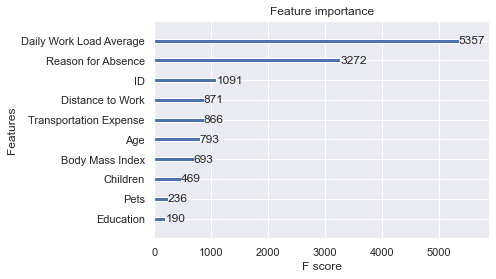

In [21]:
# Plotting the feature selection
from xgboost import plot_importance
plot_importance(model_features_selections)
plt.show() 

In [22]:
# Need to evaluatte the accuarcy of the model before taking any decision ie to use the features

from numpy import sort
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
scaler=StandardScaler()
scaler.fit(x)
# Split the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=7)
# fit model on all training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data and evaluate
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 47.19%


In [23]:
# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(model, threshold=thresh, prefit=True)
	select_X_train = selection.transform(X_train)
	# train model
	selection_model = XGBClassifier()
	selection_model.fit(select_X_train, y_train)
	# eval model
	select_X_test = selection.transform(X_test)
	predictions = selection_model.predict(select_X_test)
	accuracy = accuracy_score(y_test, predictions)
	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.057, n=10, Accuracy: 47.19%
Thresh=0.068, n=9, Accuracy: 48.48%
Thresh=0.073, n=8, Accuracy: 46.32%
Thresh=0.078, n=7, Accuracy: 44.16%
Thresh=0.083, n=6, Accuracy: 47.19%
Thresh=0.085, n=5, Accuracy: 45.02%
Thresh=0.102, n=4, Accuracy: 43.29%
Thresh=0.117, n=3, Accuracy: 44.59%
Thresh=0.137, n=2, Accuracy: 45.02%
Thresh=0.199, n=1, Accuracy: 45.45%


In [24]:
# Features with correlation of zero should be removed. 

correlation = Data.corr()
print(correlation['Absenteeism Time in Hours'].sort_values(ascending = False),'\n')

Absenteeism Time in Hours    1.000000
Children                     0.093661
Age                          0.035784
Daily Work Load Average      0.029609
Transportation Expense       0.008342
ID                          -0.005469
Pets                        -0.024522
Education                   -0.035621
Body Mass Index             -0.040203
Distance to Work            -0.080593
Reason for Absence          -0.175826
Name: Absenteeism Time in Hours, dtype: float64 



In [25]:
# The accuracy of this prediction using XGBoost is very poor and the correlation does not show any strong relationship iether with Absenteeism Time in Hours .
# This go a long way to prove that for feature selection in Logistic Regression the data needs to be reasonably processed

In [26]:
Data = pd.read_csv('Absenteeism_data.csv')
Data

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
695,17,10,23/05/2018,179,22,40,237.656,22,2,2,0,8
696,28,6,23/05/2018,225,26,28,237.656,24,1,1,2,3
697,18,10,24/05/2018,330,16,28,237.656,25,2,0,0,8
698,25,23,24/05/2018,235,16,32,237.656,25,3,0,0,2


In [27]:
# Data Preprocessing.( 1: convert Absenteeism time in hour to Binary, 2: Get dummies of reason for absence, 
# 3:convert Date to timestamp, 4: Check Outliers & missing values,5:Balance the Dataset, 6: shuffle the data )

In [28]:
x_1 = Data.copy()

In [29]:
# Establishing a yardstick for converting Absenteeism Time in Hours to Binary
median= x_1["Absenteeism Time in Hours"].median

In [30]:
median()

3.0

In [31]:
# I can moderatly say that excessively absent is > 3
target =np.where(x_1 ["Absenteeism Time in Hours"]>3,1,0)

In [32]:
# # target is reasonable balance and wont be further balanced.
# target.sum()/target.shape[0]

In [33]:
x_1["Absenteeism Time in Hours"] = target 

In [34]:
x_1

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,1
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,0
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,1
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
695,17,10,23/05/2018,179,22,40,237.656,22,2,2,0,1
696,28,6,23/05/2018,225,26,28,237.656,24,1,1,2,0
697,18,10,24/05/2018,330,16,28,237.656,25,2,0,0,1
698,25,23,24/05/2018,235,16,32,237.656,25,3,0,0,0


In [35]:
#Get dummies from (reason for absence,Education), and group dummies (1:14,15:17,18:21,22:28)
x_Reason_for_Absence= pd.get_dummies(x_1['Reason for Absence'],drop_first=True)

In [36]:
x_Reason_for_Absence

,1,2,3,4,5,6,7,8,9,10,...,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
696,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
697,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [37]:
reason_1 =x_Reason_for_Absence.loc[:, 1:14].max(axis=1)

In [38]:
reason_1

0      0
1      0
2      0
3      1
4      0
      ..
695    1
696    1
697    1
698    0
699    0
Length: 700, dtype: uint8

In [39]:
reason_2 = x_Reason_for_Absence.loc[:, 15:17].max(axis=1)

In [40]:
reason_2 

0      0
1      0
2      0
3      0
4      0
      ..
695    0
696    0
697    0
698    0
699    0
Length: 700, dtype: uint8

In [41]:
reason_3 = x_Reason_for_Absence.loc[:,18:21].max(axis=1)

In [42]:
reason_4 = x_Reason_for_Absence.loc[:,22:28].max(axis=1)

In [43]:
Reasons = pd.concat([reason_1,reason_2,reason_3,reason_4],axis =1)

In [44]:
Reasons.head()

,0,1,2,3
0,0,0,0,1
1,0,0,0,0
2,0,0,0,1
3,1,0,0,0
4,0,0,0,1


In [45]:
#Get dummies from (reason for absence,Education
x_Education_dummies= pd.get_dummies(x_1['Education'])

In [46]:
x_Education_dummies

,1,2,3,4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
695,0,1,0,0
696,1,0,0,0
697,0,1,0,0
698,0,0,1,0


In [47]:
others =x_Education_dummies.loc[:,2:4].max(axis=1)

In [48]:
others

0      0
1      0
2      0
3      0
4      0
      ..
695    1
696    0
697    1
698    1
699    0
Length: 700, dtype: uint8

In [49]:
High_school =x_Education_dummies.loc[:,1]

In [50]:
High_school

0      1
1      1
2      1
3      1
4      1
      ..
695    0
696    1
697    0
698    0
699    1
Name: 1, Length: 700, dtype: uint8

In [51]:
Education_Grades = pd.concat([High_school,others],axis =1)

In [52]:
Education_Grades

,1,0
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
695,0,1
696,1,0
697,0,1
698,0,1


In [53]:
# 3:convert Date to timestamp
type(x_1['Date'][0])

str

In [54]:
# d=day,m=month,Y=year
x_1['Date'] = pd.to_datetime(x_1['Date'],format= "%d/%m/%Y")

In [55]:
x_1

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,2015-07-07,289,36,33,239.554,30,1,2,1,1
1,36,0,2015-07-14,118,13,50,239.554,31,1,1,0,0
2,3,23,2015-07-15,179,51,38,239.554,31,1,0,0,0
3,7,7,2015-07-16,279,5,39,239.554,24,1,2,0,1
4,11,23,2015-07-23,289,36,33,239.554,30,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
695,17,10,2018-05-23,179,22,40,237.656,22,2,2,0,1
696,28,6,2018-05-23,225,26,28,237.656,24,1,1,2,0
697,18,10,2018-05-24,330,16,28,237.656,25,2,0,0,1
698,25,23,2018-05-24,235,16,32,237.656,25,3,0,0,0


In [56]:
type(x_1['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [57]:
# Extracting the Months from the Date columns. Note, month starts from 1-12


In [58]:
x_1['month'] = pd.DatetimeIndex(x_1['Date']).month

In [59]:
x_1

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,month
0,11,26,2015-07-07,289,36,33,239.554,30,1,2,1,1,7
1,36,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,7
2,3,23,2015-07-15,179,51,38,239.554,31,1,0,0,0,7
3,7,7,2015-07-16,279,5,39,239.554,24,1,2,0,1,7
4,11,23,2015-07-23,289,36,33,239.554,30,1,2,1,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,17,10,2018-05-23,179,22,40,237.656,22,2,2,0,1,5
696,28,6,2018-05-23,225,26,28,237.656,24,1,1,2,0,5
697,18,10,2018-05-24,330,16,28,237.656,25,2,0,0,1,5
698,25,23,2018-05-24,235,16,32,237.656,25,3,0,0,0,5


In [60]:
x_1['year'] = pd.DatetimeIndex(x_1['Date']).year

In [61]:
x_1

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,month,year
0,11,26,2015-07-07,289,36,33,239.554,30,1,2,1,1,7,2015
1,36,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,7,2015
2,3,23,2015-07-15,179,51,38,239.554,31,1,0,0,0,7,2015
3,7,7,2015-07-16,279,5,39,239.554,24,1,2,0,1,7,2015
4,11,23,2015-07-23,289,36,33,239.554,30,1,2,1,0,7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,17,10,2018-05-23,179,22,40,237.656,22,2,2,0,1,5,2018
696,28,6,2018-05-23,225,26,28,237.656,24,1,1,2,0,5,2018
697,18,10,2018-05-24,330,16,28,237.656,25,2,0,0,1,5,2018
698,25,23,2018-05-24,235,16,32,237.656,25,3,0,0,0,5,2018


In [62]:
# Now am going to drop Date, Reason for Absence,
x_1=x_1.drop(columns=['ID','Date','Education','Reason for Absence'], axis=1)

In [63]:
# data_to_scale will be standardize and compared with prediction obtained from unscaled to justify which is best for logistics regression.
data_to_scale = x_1.copy()

In [64]:
x_1.columns

Index(['Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Children', 'Pets',
       'Absenteeism Time in Hours', 'month', 'year'],
      dtype='object')

In [65]:
# There is a school of thought that argues that the features of logistics regression doesn't need to be standardize.
# in this study, a copy of standardize and unstandardize features will be used to exertain this argument
# case 1 = x_1 not scaled   and case 2= data_to_scale.

In [66]:
x_1 =  pd.concat([x_1,reason_1,reason_2,reason_3,reason_4],axis =1)

In [67]:
x_1.head()

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Children,Pets,Absenteeism Time in Hours,month,year,0,1,2,3
0,289,36,33,239.554,30,2,1,1,7,2015,0,0,0,1
1,118,13,50,239.554,31,1,0,0,7,2015,0,0,0,0
2,179,51,38,239.554,31,0,0,0,7,2015,0,0,0,1
3,279,5,39,239.554,24,2,0,1,7,2015,1,0,0,0
4,289,36,33,239.554,30,2,1,0,7,2015,0,0,0,1


In [68]:
x_1.columns.values

array(['Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Children', 'Pets',
       'Absenteeism Time in Hours', 'month', 'year', 0, 1, 2, 3],
      dtype=object)

In [69]:
Henry_x = ['Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Children', 'Pets',
       'Absenteeism Time in Hours', 'month', 'year', 'reason_1',  'reason_2',  'reason_3',  'reason_4']

In [70]:
x_1.columns = Henry_x

In [71]:
x_1.head()

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Children,Pets,Absenteeism Time in Hours,month,year,reason_1,reason_2,reason_3,reason_4
0,289,36,33,239.554,30,2,1,1,7,2015,0,0,0,1
1,118,13,50,239.554,31,1,0,0,7,2015,0,0,0,0
2,179,51,38,239.554,31,0,0,0,7,2015,0,0,0,1
3,279,5,39,239.554,24,2,0,1,7,2015,1,0,0,0
4,289,36,33,239.554,30,2,1,0,7,2015,0,0,0,1


In [72]:
Henry_x_reordered = ['reason_1',  'reason_2',  'reason_3',  'reason_4', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Children', 'Pets',
       'month', 'year',   'Absenteeism Time in Hours']

In [73]:
x_1 = x_1 [Henry_x_reordered ]

In [74]:
x_1.head()

,reason_1,reason_2,reason_3,reason_4,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Children,Pets,month,year,Absenteeism Time in Hours
0,0,0,0,1,289,36,33,239.554,30,2,1,7,2015,1
1,0,0,0,0,118,13,50,239.554,31,1,0,7,2015,0
2,0,0,0,1,179,51,38,239.554,31,0,0,7,2015,0
3,1,0,0,0,279,5,39,239.554,24,2,0,7,2015,1
4,0,0,0,1,289,36,33,239.554,30,2,1,7,2015,0


In [75]:
x_1 =  pd.concat([x_1,Education_Grades],axis =1)

In [76]:
x_1.columns.values

array(['reason_1', 'reason_2', 'reason_3', 'reason_4',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Children', 'Pets',
       'month', 'year', 'Absenteeism Time in Hours', 1, 0], dtype=object)

In [77]:
Henry_2 = ['reason_1', 'reason_2', 'reason_3', 'reason_4',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Children', 'Pets',
        'month', 'year','Absenteeism Time in Hours','High_school', 'others']

In [78]:
x_1.columns = Henry_2

In [79]:
x_1.columns.values

array(['reason_1', 'reason_2', 'reason_3', 'reason_4',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Children', 'Pets',
       'month', 'year', 'Absenteeism Time in Hours', 'High_school',
       'others'], dtype=object)

In [80]:
Henry_2_reordered = ['reason_1', 'reason_2', 'reason_3', 'reason_4',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Children', 'Pets',
        'month', 'year','High_school', 'others',
       'Absenteeism Time in Hours']

In [81]:
x_1 = x_1 [Henry_2_reordered]

In [82]:
x_1.head()

,reason_1,reason_2,reason_3,reason_4,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Children,Pets,month,year,High_school,others,Absenteeism Time in Hours
0,0,0,0,1,289,36,33,239.554,30,2,1,7,2015,1,0,1
1,0,0,0,0,118,13,50,239.554,31,1,0,7,2015,1,0,0
2,0,0,0,1,179,51,38,239.554,31,0,0,7,2015,1,0,0
3,1,0,0,0,279,5,39,239.554,24,2,0,7,2015,1,0,1
4,0,0,0,1,289,36,33,239.554,30,2,1,7,2015,1,0,0


In [83]:
New_mod = x_1.copy()

In [84]:
# to confirm if processing the data has improved features selection using xgboost.

In [85]:
y_new = x_1.iloc[:,-1]

In [86]:
y_new 

0      1
1      0
2      0
3      1
4      0
      ..
695    1
696    0
697    1
698    0
699    0
Name: Absenteeism Time in Hours, Length: 700, dtype: int32

In [87]:
x_1 = x_1.drop(columns=['Absenteeism Time in Hours','month'], axis=1)

In [88]:
x_1.shape

(700, 14)

In [89]:
x_1.columns.values

array(['reason_1', 'reason_2', 'reason_3', 'reason_4',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Children', 'Pets',
       'year', 'High_school', 'others'], dtype=object)

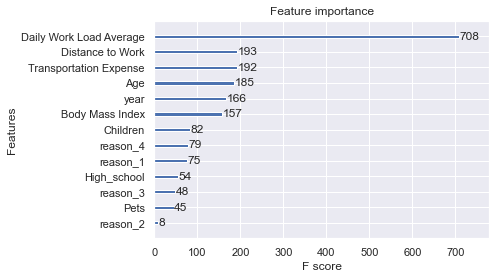

In [90]:
model_features_selections = XGBClassifier()
model_features_selections.fit(x_1, y_new)
from xgboost import plot_importance
plot_importance(model_features_selections)
plt.show()


In [91]:
# Need to evaluatte the accuarcy of the model before taking any decision ie to use the features

from numpy import sort
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
scaler=StandardScaler()
scaler.fit(x_1)
# Split the data
X_train, X_test, y_train, y_test = train_test_split(x_1, y_new, test_size=0.33, random_state=7)
# fit model on all training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data and evaluate
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 79.65%


In [92]:
# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(model, threshold=thresh, prefit=True)
	select_X_train = selection.transform(X_train)
	# train model
	selection_model = XGBClassifier()
	selection_model.fit(select_X_train, y_train)
	# eval model
	select_X_test = selection.transform(X_test)
	predictions = selection_model.predict(select_X_test)
	accuracy = accuracy_score(y_test, predictions)
	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.000, n=14, Accuracy: 79.65%
Thresh=0.000, n=14, Accuracy: 79.65%
Thresh=0.025, n=12, Accuracy: 79.65%
Thresh=0.028, n=11, Accuracy: 78.79%
Thresh=0.034, n=10, Accuracy: 79.22%
Thresh=0.035, n=9, Accuracy: 79.22%
Thresh=0.040, n=8, Accuracy: 79.65%
Thresh=0.041, n=7, Accuracy: 80.09%
Thresh=0.058, n=6, Accuracy: 80.09%
Thresh=0.065, n=5, Accuracy: 79.65%
Thresh=0.107, n=4, Accuracy: 77.49%
Thresh=0.110, n=3, Accuracy: 72.73%
Thresh=0.188, n=2, Accuracy: 72.73%
Thresh=0.269, n=1, Accuracy: 66.67%


In [93]:
# At this accuracy level attended, I would then assume all the features are significant for the study,
# next is to ensure no multicollinearity exists.
#There are 2 ways to detect the multilinear features in the data.(1)Correlation (2)Variation Inflation factor (VIF)

In [94]:
# The rule of thumb is the VIF factor is greater than 10 then those features are in multicollinearity.
from statsmodels.stats.outliers_influence import variance_inflation_factor
 
variable= x_1[['reason_1', 'reason_2', 'reason_3', 'reason_4',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Children', 'Pets',
        'High_school', 'others']]
 
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_1.values, i) for i in range(x_1.shape[1])]
 
vif["features"] = x_1.columns
 
print(vif)

      VIF Factor                 features
0   4.367960e+00                 reason_1
1   1.195014e+00                 reason_2
2   2.501611e+00                 reason_3
3   5.093105e+00                 reason_4
4   1.598745e+00   Transportation Expense
5   1.250611e+00         Distance to Work
6   1.569501e+00                      Age
7   1.102374e+00  Daily Work Load Average
8   1.634861e+00          Body Mass Index
9   1.367515e+00                 Children
10  1.341391e+00                     Pets
11  1.123633e+00                     year
12  4.033796e+06              High_school
13  8.099219e+05                   others


In [95]:
# Also confirming the multicollinearity for using the Zoomed HeatMap.
x1_data =pd.concat([x_1,y_new],axis =1)

In [96]:
x1_data.shape

(700, 15)

Index(['Absenteeism Time in Hours', 'Children', 'Age',
       'Daily Work Load Average', 'Transportation Expense', 'ID', 'Pets',
       'Education', 'Body Mass Index', 'Distance to Work',
       'Reason for Absence'],
      dtype='object')


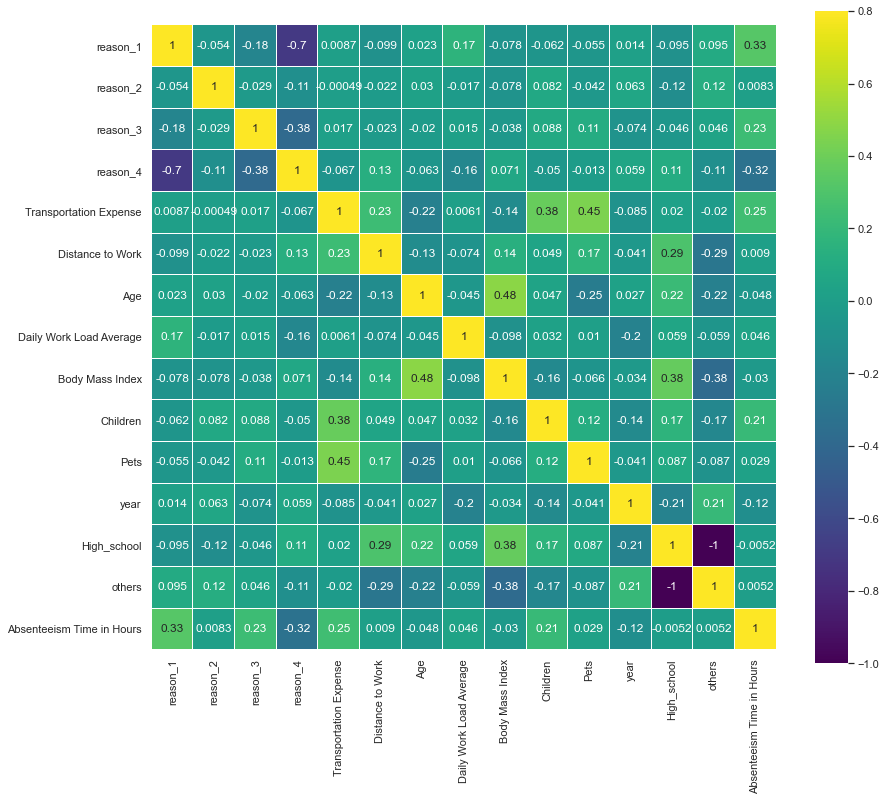

In [97]:
# Inspecting Multicollinearity using correlation.
# Zoomed HeatMap.
k= 16
cols = correlation.nlargest(k,'Absenteeism Time in Hours')['Absenteeism Time in Hours'].index
print(cols)
cm = np.corrcoef(x1_data.values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = x1_data.columns ,annot_kws = {'size':12},yticklabels = x1_data.columns)
plt.show()

In [98]:
#Balance the dataset
num_one_targets= int(np.sum(y_new))
zero_targets_counter = 0
indices_to_remove = []
for i in range (y_new.shape[0]):
    if y_new[i] == 0:
        zero_targets_counter += 1
    if zero_targets_counter > num_one_targets:
        indices_to_remove.append(i)
indices_to_keep = [*set(range(y_new.shape[0])) - set(indices_to_remove)]
x_1_equal = x_1.values[indices_to_keep]
y_new_equal = y_new.values[indices_to_keep]
 


In [99]:
print(f'Number of 1s: {len(y_new_equal[y_new_equal==1])}')
print(f'Number of 0s: {len(y_new_equal[y_new_equal==0])}')


Number of 1s: 288
Number of 0s: 319


In [100]:
# Modeling 
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
from sklearn.model_selection import train_test_split
# Split the data
X_train, X_test, y_train, y_test = train_test_split(x_1_equal, y_new_equal , test_size=0.3, random_state=7)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test) 
y_pred

C:\Users\Henry\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0])

In [101]:
# Checking the accuracy of the prediction at when features are not scaled.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred))
cm

Accuracy :  0.6666666666666666


array([[64, 29],
       [32, 58]], dtype=int64)

In [102]:
#Evaluation Metrics We will evaluate the performance of the model using two metrics
# R-squared value and Root Mean Squared Error (RMSE). Ideally, lower RMSE and higher R-squared values are indicative of a good model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(r2_score(y_test, y_pred))

0.5773502691896257
-0.33369175627240155


In [103]:
# the second approach will employ using standardized features and both results will be compared in view of justifying the arguement on weather logistics data needs to be standardized or not.

In [104]:
data_to_scale.head()

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Children,Pets,Absenteeism Time in Hours,month,year
0,289,36,33,239.554,30,2,1,1,7,2015
1,118,13,50,239.554,31,1,0,0,7,2015
2,179,51,38,239.554,31,0,0,0,7,2015
3,279,5,39,239.554,24,2,0,1,7,2015
4,289,36,33,239.554,30,2,1,0,7,2015


In [105]:
y_2 = data_to_scale.iloc[:,-3]

In [106]:
y_2 

0      1
1      0
2      0
3      1
4      0
      ..
695    1
696    0
697    1
698    0
699    0
Name: Absenteeism Time in Hours, Length: 700, dtype: int32

In [107]:
x_2 = data_to_scale .drop(columns=['Absenteeism Time in Hours','month'], axis=1)

In [108]:
x_2.columns.values

array(['Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Children', 'Pets',
       'year'], dtype=object)

In [109]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_2)
x_2_scaled = pd.DataFrame(data=sc.transform(x_2),columns=['Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Children', 'Pets',
        'year'])  

In [110]:
x_2_scaled

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Children,Pets,year
0,1.005844,0.412816,-0.536062,-0.806331,0.767431,0.880469,0.268487,-1.556984
1,-1.574681,-1.141882,2.130803,-0.806331,1.002633,-0.019280,-0.589690,-1.556984
2,-0.654143,1.426749,0.248310,-0.806331,1.002633,-0.919030,-0.589690,-1.556984
3,0.854936,-1.682647,0.405184,-0.806331,-0.643782,0.880469,-0.589690,-1.556984
4,1.005844,0.412816,-0.536062,-0.806331,0.767431,0.880469,0.268487,-1.556984
...,...,...,...,...,...,...,...,...
695,-0.654143,-0.533522,0.562059,-0.853789,-1.114186,0.880469,-0.589690,1.530520
696,0.040034,-0.263140,-1.320435,-0.853789,-0.643782,-0.019280,1.126663,1.530520
697,1.624567,-0.939096,-1.320435,-0.853789,-0.408580,-0.919030,-0.589690,1.530520
698,0.190942,-0.939096,-0.692937,-0.853789,-0.408580,-0.919030,-0.589690,1.530520


In [111]:
x_2_scaled = pd.concat([x_2_scaled,reason_1,reason_2,reason_3,reason_4],axis =1)

In [112]:
x_2_scaled.columns.values

array(['Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Children', 'Pets',
       'year', 0, 1, 2, 3], dtype=object)

In [113]:
Henry_3 = ['Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Children', 'Pets',
        'year', 'reason_1', 'reason_2', 'reason_3', 'reason_4']

In [114]:
x_2_scaled.columns = Henry_3 

In [115]:
x_2_scaled

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Children,Pets,year,reason_1,reason_2,reason_3,reason_4
0,1.005844,0.412816,-0.536062,-0.806331,0.767431,0.880469,0.268487,-1.556984,0,0,0,1
1,-1.574681,-1.141882,2.130803,-0.806331,1.002633,-0.019280,-0.589690,-1.556984,0,0,0,0
2,-0.654143,1.426749,0.248310,-0.806331,1.002633,-0.919030,-0.589690,-1.556984,0,0,0,1
3,0.854936,-1.682647,0.405184,-0.806331,-0.643782,0.880469,-0.589690,-1.556984,1,0,0,0
4,1.005844,0.412816,-0.536062,-0.806331,0.767431,0.880469,0.268487,-1.556984,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
695,-0.654143,-0.533522,0.562059,-0.853789,-1.114186,0.880469,-0.589690,1.530520,1,0,0,0
696,0.040034,-0.263140,-1.320435,-0.853789,-0.643782,-0.019280,1.126663,1.530520,1,0,0,0
697,1.624567,-0.939096,-1.320435,-0.853789,-0.408580,-0.919030,-0.589690,1.530520,1,0,0,0
698,0.190942,-0.939096,-0.692937,-0.853789,-0.408580,-0.919030,-0.589690,1.530520,0,0,0,1


In [116]:
x_2_scaled = pd.concat([x_2_scaled,Education_Grades],axis =1)

In [117]:
x_2_scaled

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Children,Pets,year,reason_1,reason_2,reason_3,reason_4,1,0
0,1.005844,0.412816,-0.536062,-0.806331,0.767431,0.880469,0.268487,-1.556984,0,0,0,1,1,0
1,-1.574681,-1.141882,2.130803,-0.806331,1.002633,-0.019280,-0.589690,-1.556984,0,0,0,0,1,0
2,-0.654143,1.426749,0.248310,-0.806331,1.002633,-0.919030,-0.589690,-1.556984,0,0,0,1,1,0
3,0.854936,-1.682647,0.405184,-0.806331,-0.643782,0.880469,-0.589690,-1.556984,1,0,0,0,1,0
4,1.005844,0.412816,-0.536062,-0.806331,0.767431,0.880469,0.268487,-1.556984,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,-0.654143,-0.533522,0.562059,-0.853789,-1.114186,0.880469,-0.589690,1.530520,1,0,0,0,0,1
696,0.040034,-0.263140,-1.320435,-0.853789,-0.643782,-0.019280,1.126663,1.530520,1,0,0,0,1,0
697,1.624567,-0.939096,-1.320435,-0.853789,-0.408580,-0.919030,-0.589690,1.530520,1,0,0,0,0,1
698,0.190942,-0.939096,-0.692937,-0.853789,-0.408580,-0.919030,-0.589690,1.530520,0,0,0,1,0,1


In [118]:
x_2_scaled.columns.values

array(['Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Children', 'Pets',
       'year', 'reason_1', 'reason_2', 'reason_3', 'reason_4', 1, 0],
      dtype=object)

In [119]:
x_henry_reordered = ['Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Children', 'Pets',
        'year', 'reason_1', 'reason_2', 'reason_3', 'reason_4', 'High_school', 'others']

In [120]:
x_2_scaled.columns = x_henry_reordered

In [121]:
x_2_scaled.head()

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Children,Pets,year,reason_1,reason_2,reason_3,reason_4,High_school,others
0,1.005844,0.412816,-0.536062,-0.806331,0.767431,0.880469,0.268487,-1.556984,0,0,0,1,1,0
1,-1.574681,-1.141882,2.130803,-0.806331,1.002633,-0.019280,-0.589690,-1.556984,0,0,0,0,1,0
2,-0.654143,1.426749,0.248310,-0.806331,1.002633,-0.919030,-0.589690,-1.556984,0,0,0,1,1,0
3,0.854936,-1.682647,0.405184,-0.806331,-0.643782,0.880469,-0.589690,-1.556984,1,0,0,0,1,0
4,1.005844,0.412816,-0.536062,-0.806331,0.767431,0.880469,0.268487,-1.556984,0,0,0,1,1,0


In [122]:
#Balance the dataset
num_one_targets= int(np.sum(y_2))
zero_targets_counter = 0
indices_to_remove = []
for i in range (y_2.shape[0]):
    if y_new[i] == 0:
        zero_targets_counter += 1
    if zero_targets_counter > num_one_targets:
        indices_to_remove.append(i)
indices_to_keep = [*set(range(y_2.shape[0])) - set(indices_to_remove)]
x_2_scaled_equal = x_2_scaled.values[indices_to_keep]
y_2_equal = y_new.values[indices_to_keep]
 

In [123]:
print(f'Number of 1s: {len(y_2_equal[y_2_equal==1])}')
print(f'Number of 0s: {len(y_2_equal[y_2_equal==0])}')


Number of 1s: 288
Number of 0s: 319


In [124]:
# Modeling
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
from sklearn.model_selection import train_test_split
# Split the data
x_train, x_test, y_train, y_test = train_test_split(x_2_scaled_equal, y_2_equal , test_size=0.3, random_state=7)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test) 
y_pred

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0])

In [125]:
# Checking the accuracy of the prediction at when features are not scaled.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred))
cm

Accuracy :  0.726775956284153


array([[77, 16],
       [34, 56]], dtype=int64)

In [126]:
#Evaluation Metrics We will evaluate the performance of the model using two metrics
# R-squared value and Root Mean Squared Error (RMSE). Ideally, lower RMSE and higher R-squared values are indicative of a good model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(r2_score(y_test, y_pred))

0.5227083734893168
-0.09318996415770608


In [127]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})

In [128]:
df 

,Real Values,Predicted Values
0,1,1
1,1,0
2,1,1
3,1,0
4,0,0
...,...,...
178,1,1
179,1,0
180,1,1
181,0,0


In [129]:
classifier.intercept_

array([-1.25421724])

In [130]:
# Backward elimination is an approach to improve the model by removing values that are insignifficants to the study. ie coeff = 0
classifier.coef_


array([[ 0.49837243,  0.01438707, -0.08913505, -0.10449918,  0.13924074,
         0.31279758, -0.21973515, -0.18595021,  2.54623302,  1.17575961,
         2.42695504,  0.33862512, -0.00785354,  0.00937795]])

In [131]:
x_1.columns.values

array(['reason_1', 'reason_2', 'reason_3', 'reason_4',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Children', 'Pets',
       'year', 'High_school', 'others'], dtype=object)

In [132]:
feature_name = x_1.columns.values

In [133]:
summary_table = pd.DataFrame(data = feature_name,columns = ['feature_name '])

In [134]:
summary_table['coefficients'] =np.transpose(classifier.coef_)

In [135]:
summary_table

,feature_name,coefficients
0,reason_1,0.498372
1,reason_2,0.014387
2,reason_3,-0.089135
3,reason_4,-0.104499
4,Transportation Expense,0.139241
5,Distance to Work,0.312798
6,Age,-0.219735
7,Daily Work Load Average,-0.185950
8,Body Mass Index,2.546233
9,Children,1.175760


In [136]:
# from the Analysis done and comparism of both accuracy, it is confirmed that using a scaled features gives a more accuracy than the unscaled features
# for unscaled Accuracy :  0.6775956284153005 & Accuracy :  0.7049180327868853

In [137]:
# effort could be made to improve the accuracy by removing features with insignificance coefficient. at the period of this study, am yet to see materials detailing on hyperparameters of Logistics Regression.
# This also go along way identifying whhy deep learning still remains highly essential in Logistics Regression.